# DSCI 100 Group Project Proposal
Athan Mellios <br>
Aviva Mei <br>
Alvin Zhou <br>
Richard Luo <br>

## Introduction:

Facebook is a social media platform where companies can post different types of media to promote and advertise their brand and products. To determine the times when posting content is most impactful, we asked:
**When is the best time of day to post for the highest total engagement?**
The dataset that will be used to answer the question is from a study called *Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach.* The dataset contains data related to posts published in 2014 on a renowned cosmetics brand’s Facebook page. 

## Preliminary Exploratory Data Analysis:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:

temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip",temp)

#Reading the data in R
facebook <- read_csv2(unz(temp, "dataset_Facebook.csv"))
head(facebook)
unlink(temp)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `Page total likes` = col_double(),
  Type = col_character(),
  Category = col_double(),
  `Post Month` = col_double(),
  `Post Weekday` = col_double(),
  `Post Hour` = col_double(),
  Paid = col_double(),
  `Lifetime Post Total Reach` = col_double(),
  `Lifetime Post Total Impressions` = col_double(),
  `Lifetime Engaged Users` = col_double(),
  `Lifetime Post Consumers` = col_double(),
  `Lifetime Post Consumptions` = col_double(),
  `Lifetime Post Impressions by people who have liked your Page` = col_double(),
  `Lifetime Post reach by people who like your Page` = col_double(),
  `Lifetime People who have liked your Page and engaged with your post` = col_double(),
  comment = col_double(),
  like = col_double(),
  share = col_double(),
  `Total Interactions` = col_double()
)



Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



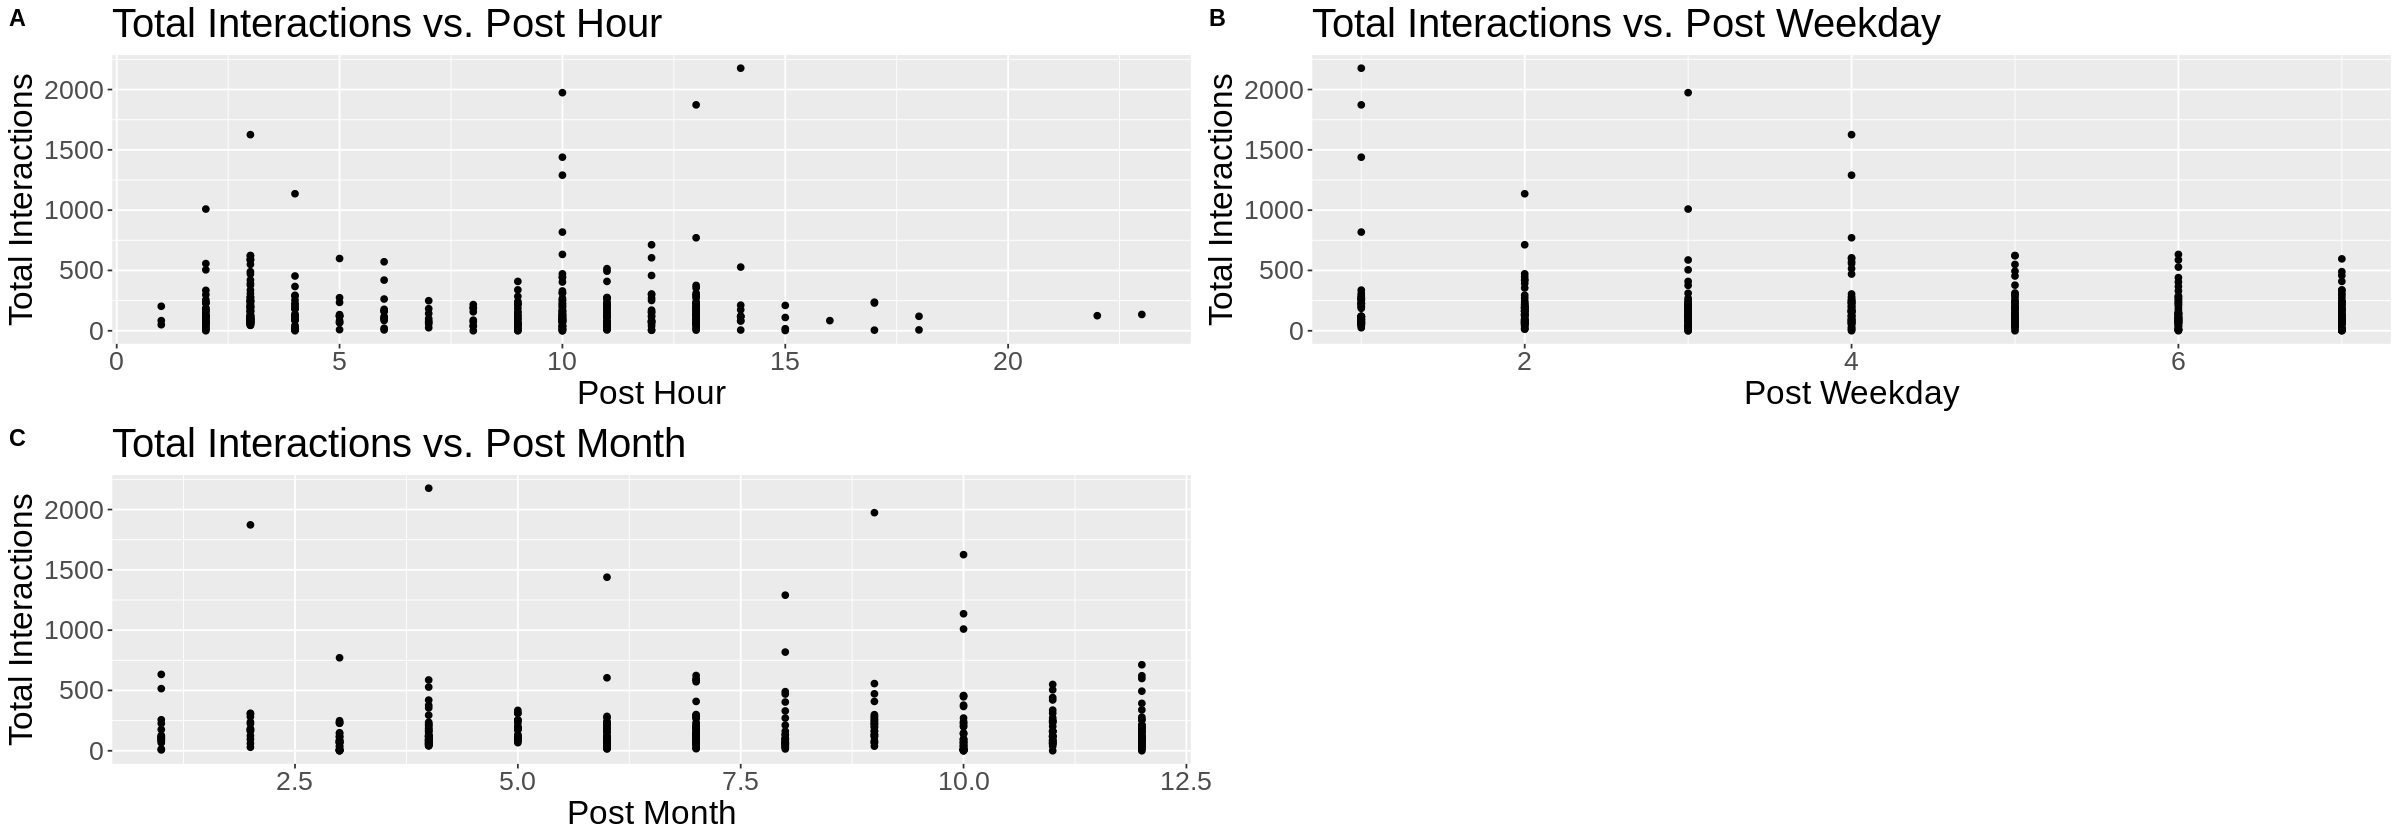

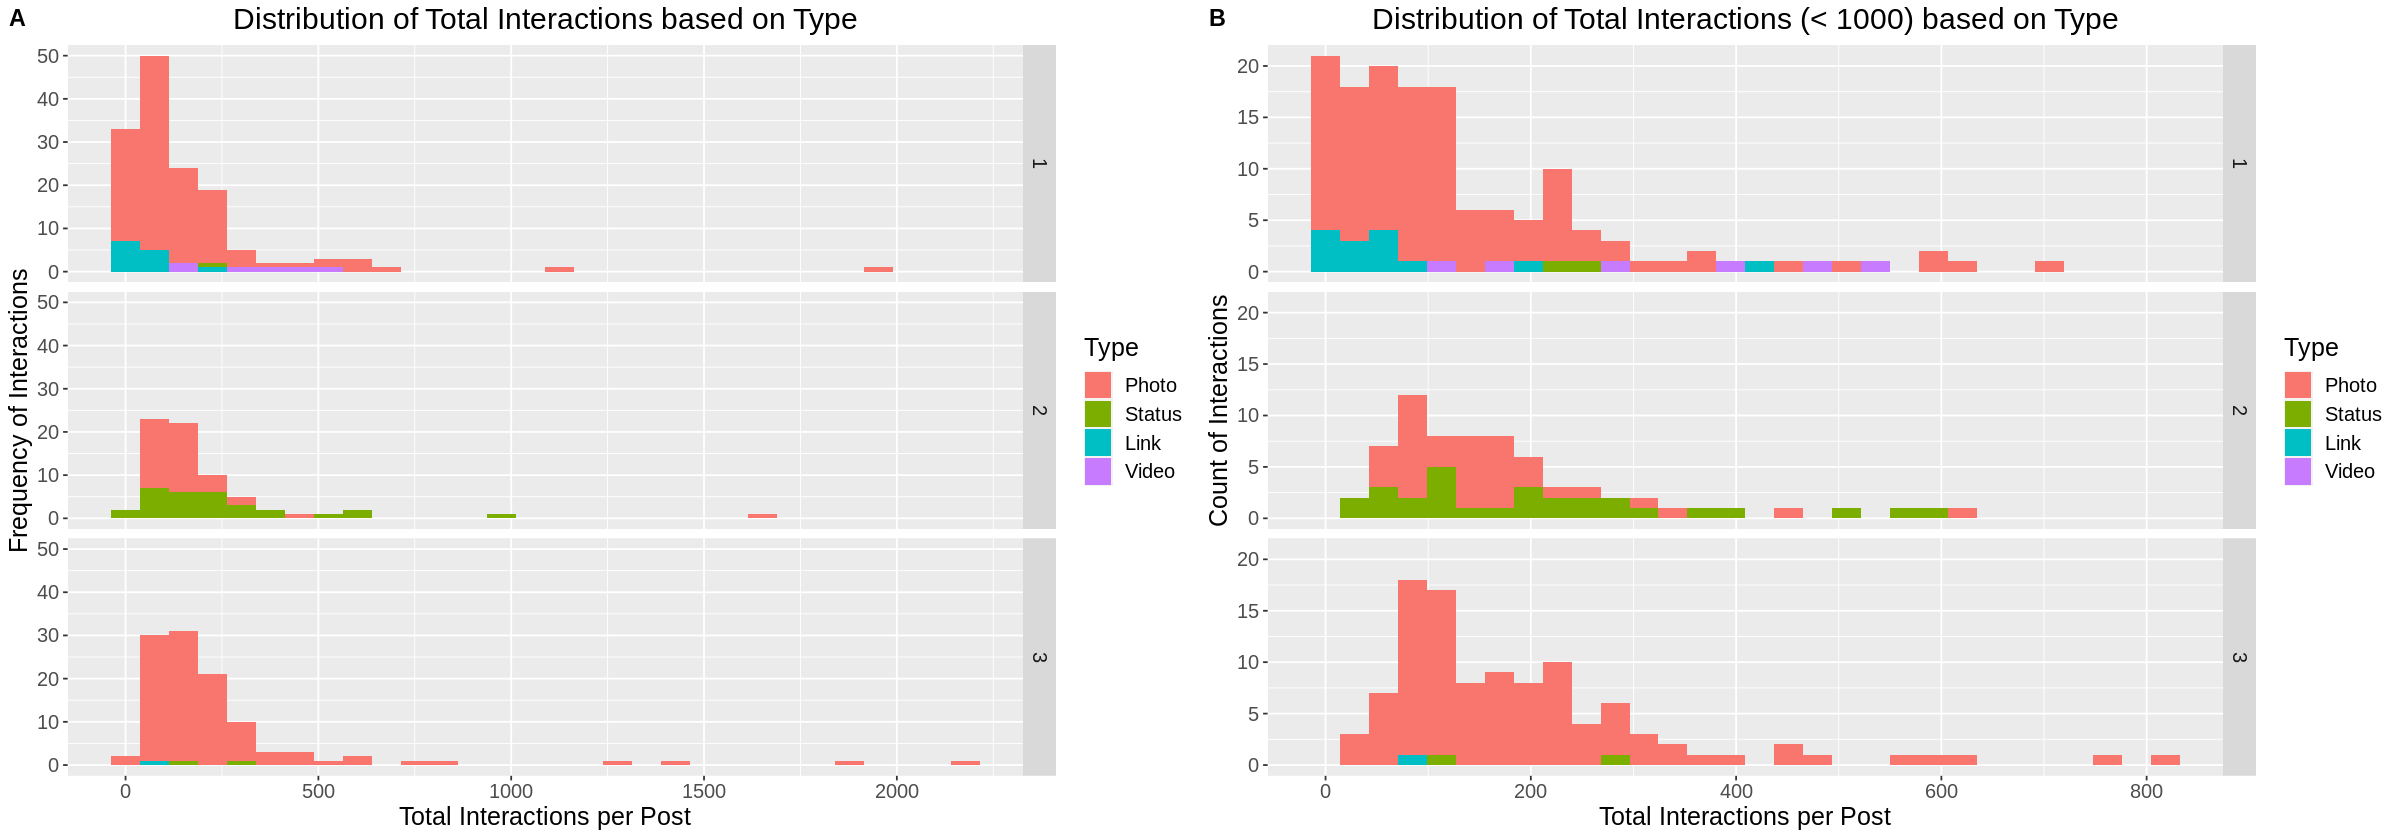

In [6]:
set.seed(1)                      

#Split into training (75 percent of data set) and test data
facebook_split <- initial_split(facebook, prop = 0.75, strata = `Total Interactions`)
facebook_train <- training(facebook_split)
facebook_test <- testing(facebook_split)

#After finding one specific row containing interactions > 6000, we decided to filter the outlier
facebook_train_filter <- filter(facebook_train, `Total Interactions` < 5000)

#ScatterPlot for Total Interactions Every Hour
facebook_plot = ggplot(data = facebook_train_filter, aes(x = `Post Hour`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total Interactions vs. Post Hour") +
    theme(text = element_text(size = 20))

#ScatterPlot for Total Interactions Every Weekday
facebook_plot2 = ggplot(data = facebook_train_filter, aes(x = `Post Weekday`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total Interactions vs. Post Weekday") +
    theme(text = element_text(size = 20))

#Plot for Total Interactions Every Month
facebook_plot3 = ggplot(data = facebook_train_filter, aes(x = `Post Month`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total Interactions vs. Post Month") +
    theme(text = element_text(size = 20))
#Distribution of Total Interactions
distribution_histogram <- ggplot(facebook_train_filter, aes(x = `Total Interactions`, fill = as_factor(Type))) +
                          geom_histogram(position = "identity") +
                          facet_grid(Category ~ .) +
                          labs(x = "Total Interactions per Post", y = "Frequency of Interactions", fill = "Type", 
                               title = "Distribution of Total Interactions based on Type") +
                          theme(plot.title = element_text(hjust = 0.5)) +
                          theme(text = element_text(size = 15))

#Knowing that the majority of the interactions occur below 1000, we also created an additional graph with an emphasis of interactions < 1000
#Distribution of Total Interactions #2
facebook_train_filter2 <- filter(facebook_train, `Total Interactions` < 1000)
distribution_histogram_zoomed <- ggplot(facebook_train_filter2, aes(x = `Total Interactions`, fill = as_factor(Type))) +
                          geom_histogram(position = "identity") +
                          facet_grid(Category ~ .) +
                          labs(x = "Total Interactions per Post", y = "Count of Interactions", fill = "Type", 
                               title = "Distribution of Total Interactions (< 1000) based on Type") +
                          theme(plot.title = element_text(hjust = 0.5)) +
                          theme(text = element_text(size = 15))
options(repr.plot.width = 20, repr.plot.height. = 15)
scatter_plots <- plot_grid(facebook_plot, facebook_plot2, facebook_plot3, labels = "AUTO")
scatter_plots
distribution_plots <- plot_grid(distribution_histogram, distribution_histogram_zoomed, labels = "AUTO")
distribution_plots

In [4]:
#Min, Max, and Average of Total Interactions
min_interactions <- min(facebook_train[["Total Interactions"]])
max_interactions <- max(facebook_train[["Total Interactions"]])
average_interactions <- mean(facebook_train[["Total Interactions"]])

#Total Number of Observations
observation_total <- nrow(facebook_train)

#Total Number of Variables
variable_total <- ncol(facebook_train)
#Exploratory Data Analysis Table
exploratory_table <- facebook_train %>%
                     mutate(facebook_train, average_total_interactions = average_interactions) %>%
                     mutate(facebook_train, observation_total = observation_total) %>%
                     mutate(facebook_train, variable_total = variable_total) %>%
                     mutate(facebook_train, min_interactions = min_interactions) %>%
                     mutate(facebook_train, max_interactions = max_interactions) %>%
                     select(average_total_interactions, observation_total, variable_total, min_interactions, max_interactions) %>%
                     slice(1)
exploratory_table
exploratory_table_2 <- facebook_train %>%
                       select(`Page total likes`, Type, Category, `Total Interactions`)
exploratory_table_2

average_total_interactions,observation_total,variable_total,min_interactions,max_interactions
<dbl>,<int>,<int>,<dbl>,<dbl>
210.4271,377,19,0,6334


Page total likes,Type,Category,Total Interactions
<dbl>,<chr>,<dbl>,<dbl>
139441,Photo,2,100
139441,Status,2,164
139441,Photo,2,393
⋮,⋮,⋮,⋮
85093,Photo,3,84
81370,Photo,1,115
81370,Photo,2,119


## Methods:

Our goal is to make an accurate prediction of the best time to post for the highest total engagement. The highest total interaction will be measured using the number of shares, likes, and comments on a post. The best time will be presented in terms of month, day, and hour. Since time is a numerical value, we will be using regression to answer our question. This will require creating and tuning a K-nearest neighbor classifier with cross-validation on our scaled training dataset. 

The columns that we will be using as the predictors are: **Comment, Share, and Likes.** The columns that will be used as the predictants are: Post Month, Post Weekday, Post Hour. We are selecting Post Month and Post Weekday for our analysis because there might be differences in activity during certain months or on certain weekdays that could skew the data if not included. 

For our visualization, we will be graphing the tuning of the nearest_neighbors function in order to determine the best K to use. We will then graph the final prediction we create by putting our predictions on a line graph overtop a scatterplot graph to showcase the accuracy of our model and prediction.

## Expected outcomes and significance:

Generally, we’d expect to find the distribution of the variables to be centralized in two main timeframes; one in the morning (7 AM- 9 AM) as people are to be expected to reach for their phones, and one in the evenings (7 PM- 9 PM), where people are more likely to be done with school or work.

These findings are beneficial in a magnitude of different ways; including advertisers, influencers, and even you! Placing an advertisement at the most optimal time can not only significantly boost consumer interaction, but can also save money in the long run. Furthermore, ha

The first question that comes to mind is the why? factor; what is usually happening in that specific timeframe that attracts human engagement? Is it the time of the day, when people get out of school and happen to browse their phones, or are there external factors out of our control, such as the quality of the post itself. Furthermore, we can also conclude that engagement may be entirely subjective, meaning that it potentially varies from individual to individual.
